In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/TrueCue/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/TrueCue


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.lines import Line2D
import matplotlib

## Import latest Covid data from Our World in Data

In [ ]:
df=pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv') 
df.head().T

,0,1,2,3,4
iso_code,ABW,ABW,ABW,ABW,ABW
continent,North America,North America,North America,North America,North America
location,Aruba,Aruba,Aruba,Aruba,Aruba
date,2020-03-13,2020-03-19,2020-03-20,2020-03-21,2020-03-22
total_cases,2,NaN,4,NaN,NaN
new_cases,2,NaN,2,NaN,NaN
new_cases_smoothed,NaN,0.286,0.286,0.286,0.286
total_deaths,NaN,NaN,NaN,NaN,NaN
new_deaths,0,NaN,0,NaN,NaN
new_deaths_smoothed,NaN,0,0,0,0


In [ ]:
# extract new_cases: New confirmed cases of COVID-19
df_pvt=df.pivot(index='date', columns='iso_code', values='new_cases').fillna(0.)
df_pvt.tail()

iso_code,NaN,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,ATG,AUS,AUT,AZE,BDI,BEL,BEN,BES,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BLZ,BMU,BOL,BRA,BRB,BRN,BTN,BWA,CAF,CAN,CHE,CHL,CHN,CIV,CMR,...,SLV,SMR,SOM,SRB,SSD,STP,SUR,SVK,SVN,SWE,SWZ,SXM,SYC,SYR,TCA,TCD,TGO,THA,TJK,TLS,TTO,TUN,TUR,TWN,TZA,UGA,UKR,URY,USA,UZB,VAT,VCT,VEN,VGB,VIR,VNM,YEM,ZAF,ZMB,ZWE
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-12,0.0,6.0,96.0,215.0,0.0,168.0,0.0,1096.0,10310.0,715.0,0.0,20.0,1298.0,230.0,7.0,2365.0,0.0,1.0,9.0,1193.0,531.0,0.0,55.0,0.0,1063.0,0.0,0.0,111.0,12345.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1776.0,34.0,26.0,0.0,...,245.0,0.0,17.0,102.0,16.0,7.0,16.0,1054.0,411.0,161.0,9.0,3.0,0.0,0.0,0.0,13.0,5.0,7.0,42.0,0.0,58.0,0.0,1502.0,0.0,0.0,100.0,4768.0,26.0,43597.0,204.0,0.0,0.0,684.0,0.0,0.0,2.0,0.0,1575.0,119.0,1.0
2020-10-13,0.0,3.0,129.0,120.0,0.0,171.0,299.0,1064.0,9524.0,1115.0,0.0,22.0,608.0,122.0,1.0,8582.0,0.0,2.0,14.0,1472.0,587.0,661.0,85.0,920.0,464.0,142.0,0.0,121.0,8426.0,0.0,0.0,0.0,313.0,0.0,4722.0,4057.0,1517.0,18.0,1.0,0.0,...,0.0,0.0,0.0,67.0,10.0,0.0,7.0,504.0,167.0,637.0,14.0,0.0,0.0,101.0,1.0,4.0,9.0,2.0,38.0,1.0,15.0,1297.0,1614.0,3.0,0.0,63.0,4420.0,19.0,41653.0,436.0,7.0,0.0,619.0,0.0,0.0,1.0,1.0,0.0,91.0,10.0
2020-10-14,0.0,32.0,66.0,122.0,0.0,182.0,0.0,1315.0,13305.0,1058.0,0.0,31.0,1171.0,277.0,4.0,7565.0,0.0,0.0,11.0,1537.0,785.0,324.0,0.0,336.0,526.0,16.0,1.0,227.0,10220.0,2.0,0.0,4.0,206.0,1.0,4042.0,1439.0,1392.0,28.0,28.0,130.0,...,284.0,0.0,0.0,152.0,11.0,0.0,14.0,531.0,399.0,916.0,13.0,9.0,0.0,52.0,0.0,13.0,23.0,9.0,37.0,0.0,11.0,0.0,1632.0,0.0,0.0,81.0,5133.0,24.0,52517.0,325.0,0.0,0.0,635.0,0.0,3.0,3.0,0.0,2066.0,38.0,15.0
2020-10-15,0.0,26.0,32.0,192.0,0.0,203.0,195.0,1431.0,14932.0,0.0,1.0,24.0,1606.0,369.0,0.0,0.0,67.0,0.0,0.0,1684.0,819.0,349.0,222.0,482.0,597.0,34.0,0.0,219.0,27235.0,5.0,1.0,3.0,0.0,0.0,2506.0,2724.0,1092.0,11.0,34.0,108.0,...,286.0,0.0,0.0,245.0,0.0,0.0,11.0,1410.0,707.0,773.0,19.0,10.0,0.0,57.0,0.0,8.0,11.0,13.0,39.0,0.0,27.0,2234.0,1671.0,0.0,0.0,124.0,5590.0,1.0,59386.0,316.0,0.0,0.0,614.0,0.0,0.0,9.0,1.0,1877.0,29.0,19.0
2020-10-16,0.0,30.0,0.0,166.0,0.0,257.0,0.0,1398.0,17096.0,1371.0,0.0,21.0,1396.0,530.0,0.0,0.0,18.0,0.0,30.0,1600.0,914.0,333.0,0.0,569.0,613.0,63.0,0.0,178.0,28523.0,3.0,0.0,0.0,203.0,0.0,2345.0,2690.0,1124.0,36.0,40.0,0.0,...,295.0,7.0,0.0,203.0,9.0,0.0,11.0,1929.0,746.0,0.0,18.0,8.0,1.0,48.0,0.0,21.0,13.0,4.0,38.0,0.0,40.0,0.0,1693.0,5.0,0.0,48.0,5062.0,79.0,63785.0,309.0,7.0,0.0,464.0,0.0,1.0,2.0,0.0,1770.0,43.0,20.0


In [ ]:
# make a dataframe of the 14 day notification rate per 100_000 population
df_14_day=pd.DataFrame()
for col in df_pvt.columns:
  df_14_day[col]=df_pvt[col].rolling(window=14).sum()

df_14_day.fillna(0., inplace=True)

for col in df_14_day.columns[1:]:
  popn=(df.loc[(df.date=='2020-10-01') & (df.iso_code==col), 'population']/100000).values
  if len(popn) > 0:
    df_14_day[col]=df_14_day[col]/popn
  else:
    print (col)

df_14_day = df_14_day.T
df_14_day.head()

SLB


,2019-12-31,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,61.0,64.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,825.169061,799.880112,860.760916,908.528932,909.465560,929.134743,954.423693,982.522526,987.205665,981.585898,1046.213214,1020.924264,1032.163797,966.599854,1032.163797,1034.973681,1007.811476,928.198116,877.620216,843.901617,784.894067,747.428957,760.541745,732.442913,594.758631,576.962703,541.370848,575.089448,494.539460,460.820861,401.813311,362.474945,353.108668,344.679018,333.439484,327.819718,304.404024,276.305191,273.495307,268.812169
AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.024960,1.089181,1.153401,1.073768,1.137988,1.197071,1.279274,1.423128,1.590101,1.669735,1.615789,1.500192,1.579826,1.849552,1.659459,1.489917,1.605514,1.608083,1.577257,1.505330,1.505330,1.312668,1.089181,1.024960,1.017254,1.060924,0.953033,0.649912,0.762940,1.058355,1.035235,1.145695,1.302393,1.312668,1.222760,1.469366,1.769919,1.900929,1.947167,1.903498
AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.324572,2.260677,2.123758,2.132886,2.059863,2.269804,2.215037,2.163312,2.324572,2.388467,2.555812,2.957440,2.993951,3.118699,3.213021,3.505114,3.818505,3.660288,3.867187,3.827633,3.988892,4.068001,4.287070,4.460500,4.268814,3.721140,4.031489,3.985850,4.195791,3.812419,4.530481,4.530481,4.563950,4.512225,4.384435,4.789105,4.773892,4.816488,5.196818,5.701895
AIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_14_day.loc['CZE'].tail(10)

2020-10-07    344.234401
2020-10-08    372.547082
2020-10-09    395.770578
2020-10-10    448.744801
2020-10-11    473.555750
2020-10-12    490.364070
2020-10-13    518.611386
2020-10-14    578.056812
2020-10-15    657.121284
2020-10-16    698.058882
Name: CZE, dtype: float64

In [ ]:
cut_labels=['<20','20-59.9','60-119.9','120-239.9','240-479.9','>480']
cut_bins = [-1, 20., 60., 120., 240., 480., 2000.]
color_dict={'<20':'lemonchiffon','20-59.9':'yellow','60-119.9':'orange','120-239.9':'sandybrown','240-479.9':'brown','>480':'red'}

iso_3166=pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/slim-3/slim-3.csv',
                     dtype={'name':'str','alpha-3':'str','country-code':'float64'})

cells = pd.read_csv("https://raw.githubusercontent.com/mattdzugan/World-Population-Cartogram/master/data/year_2018__cell_500k/squares_and_triangles/cells.csv")

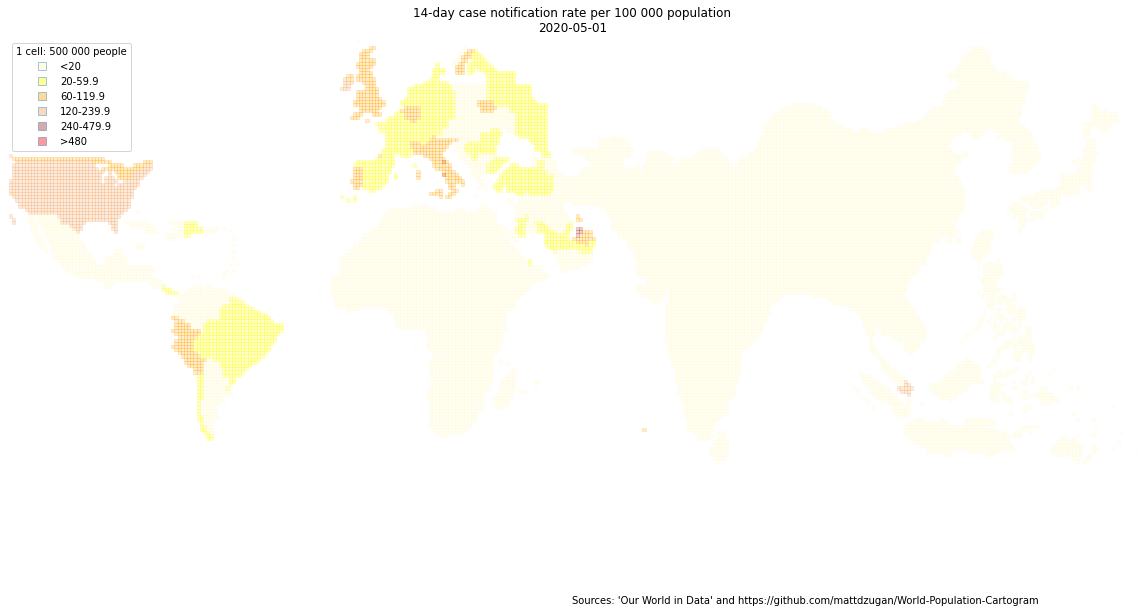

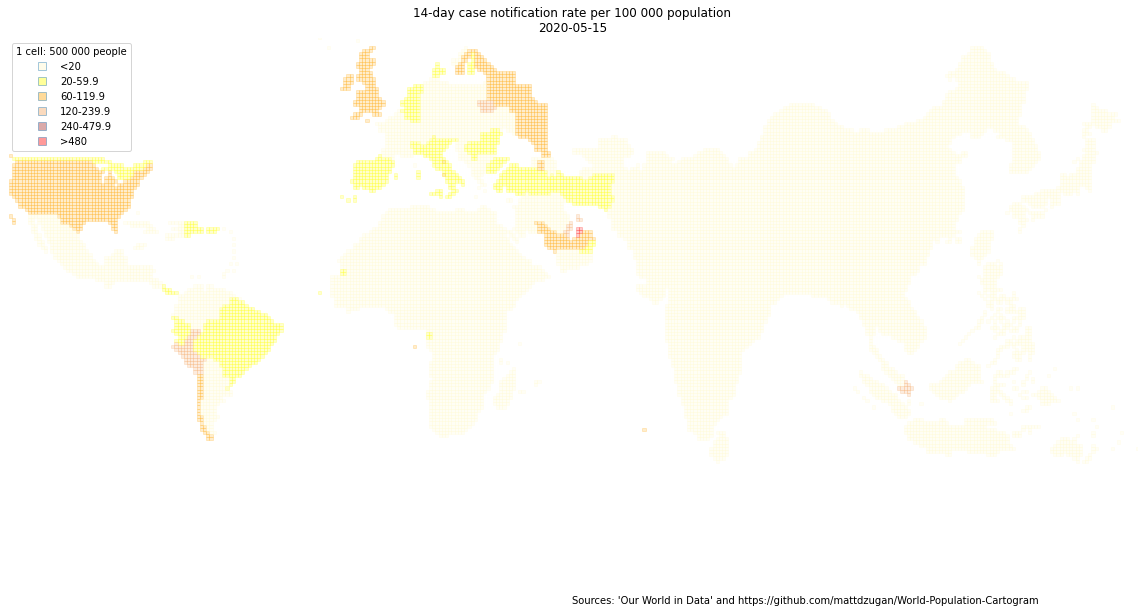

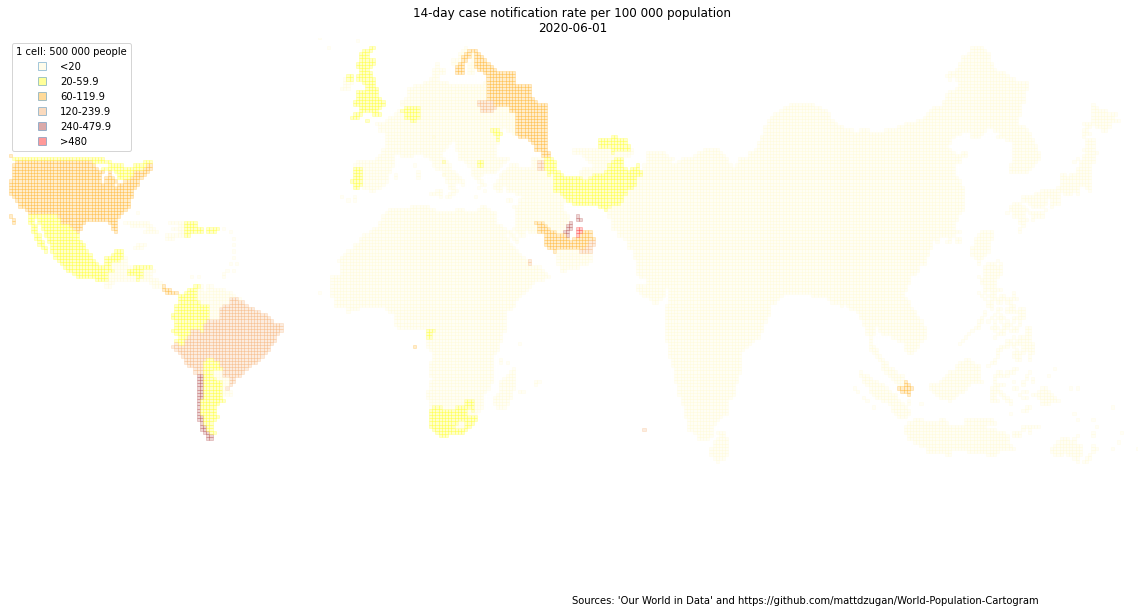

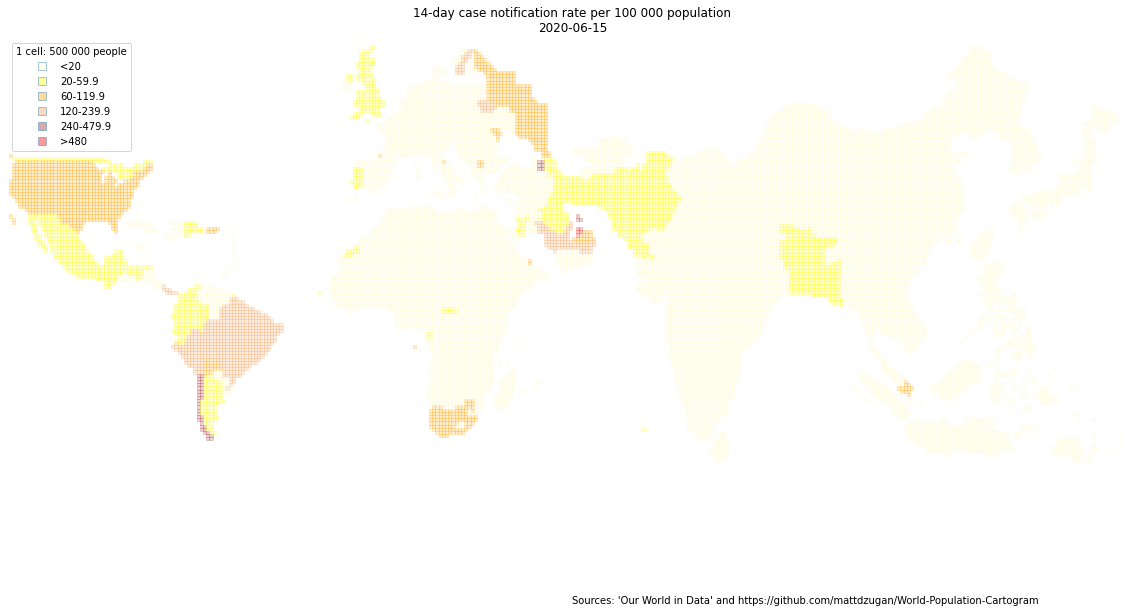

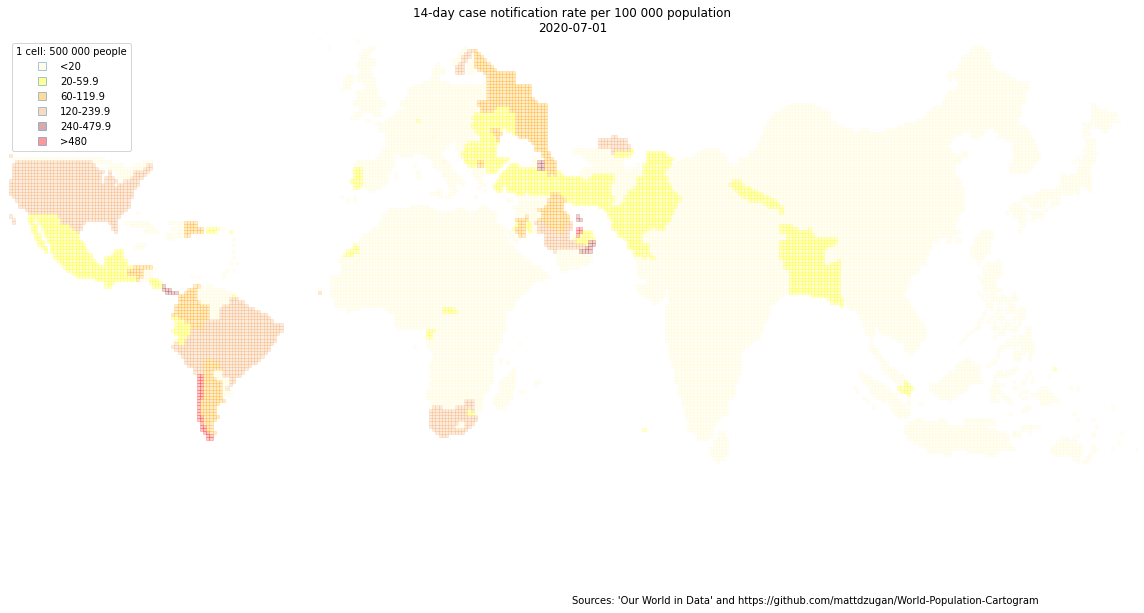

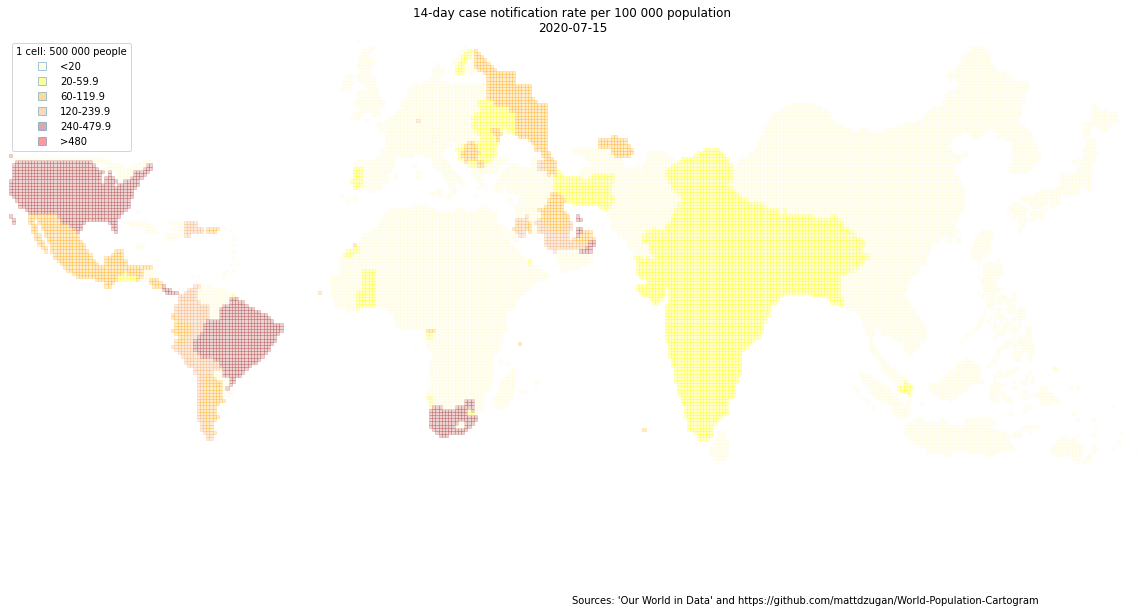

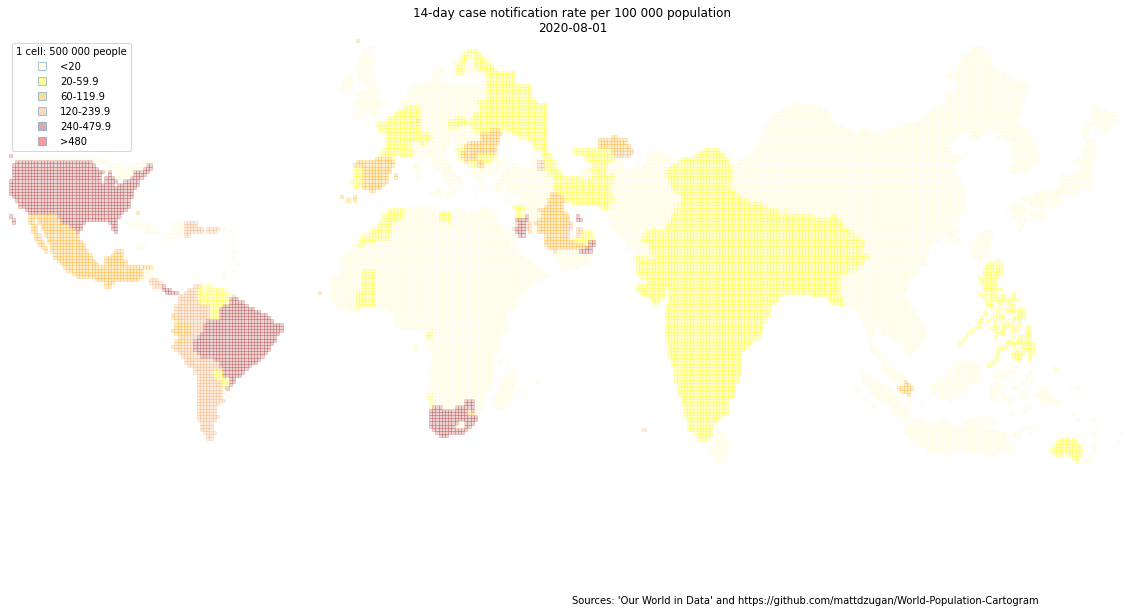

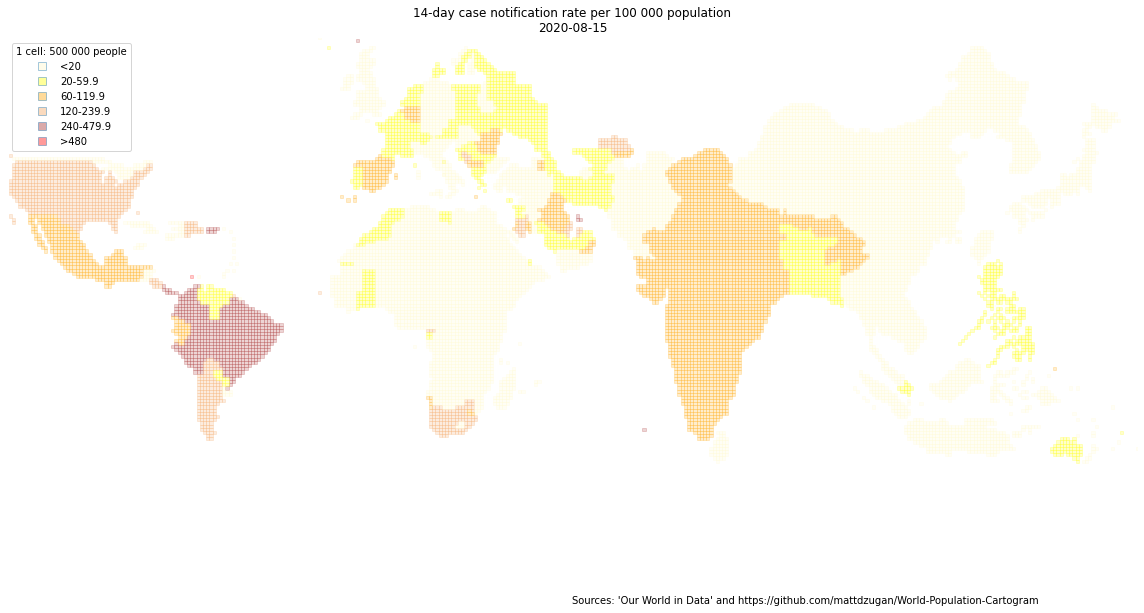

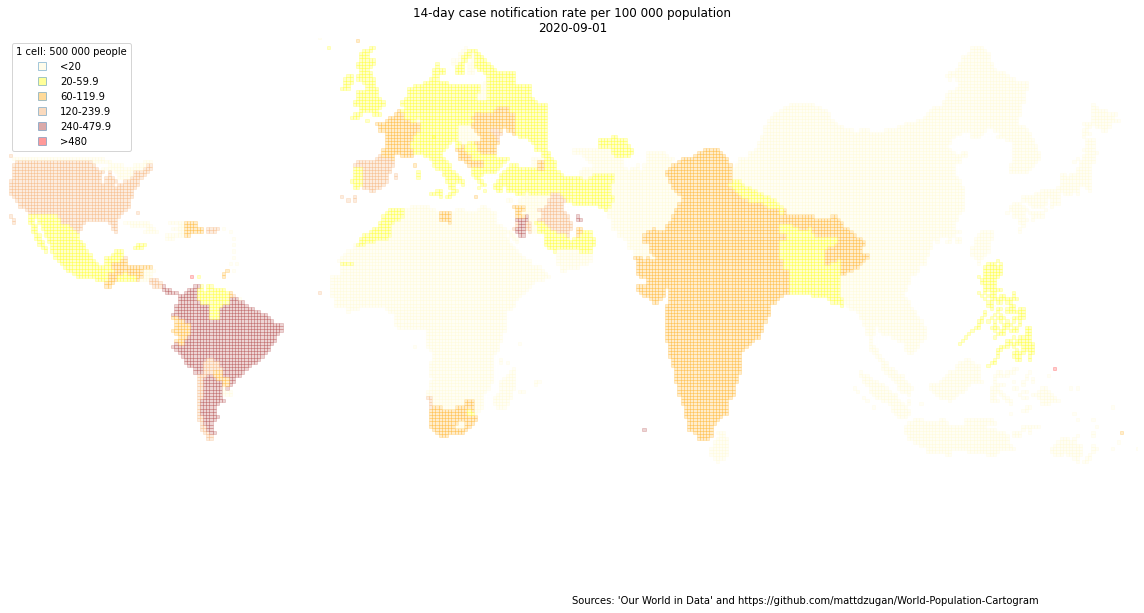

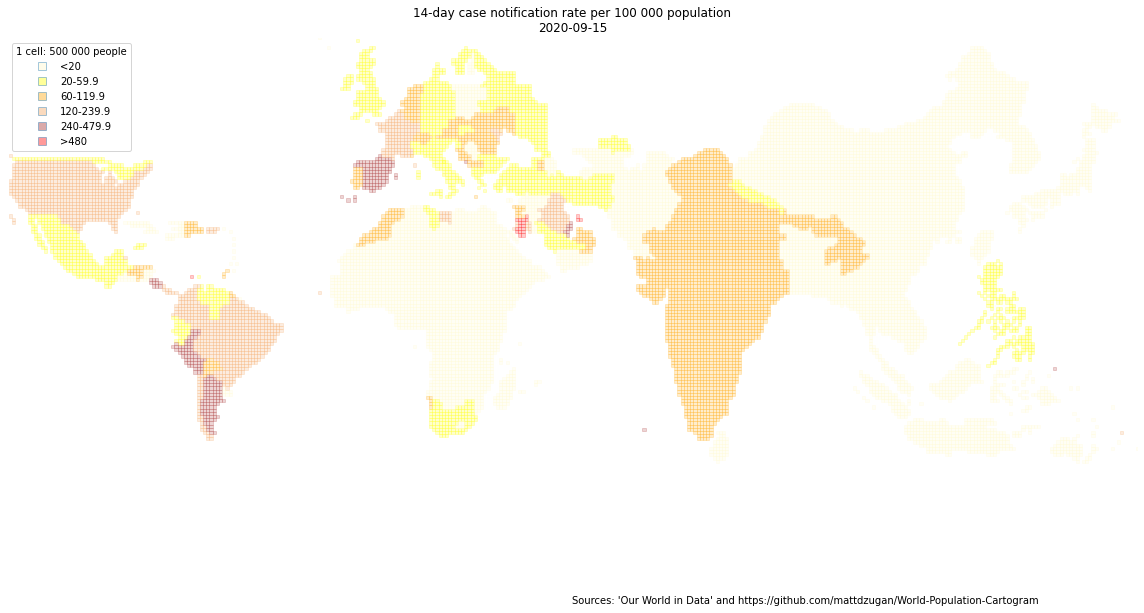

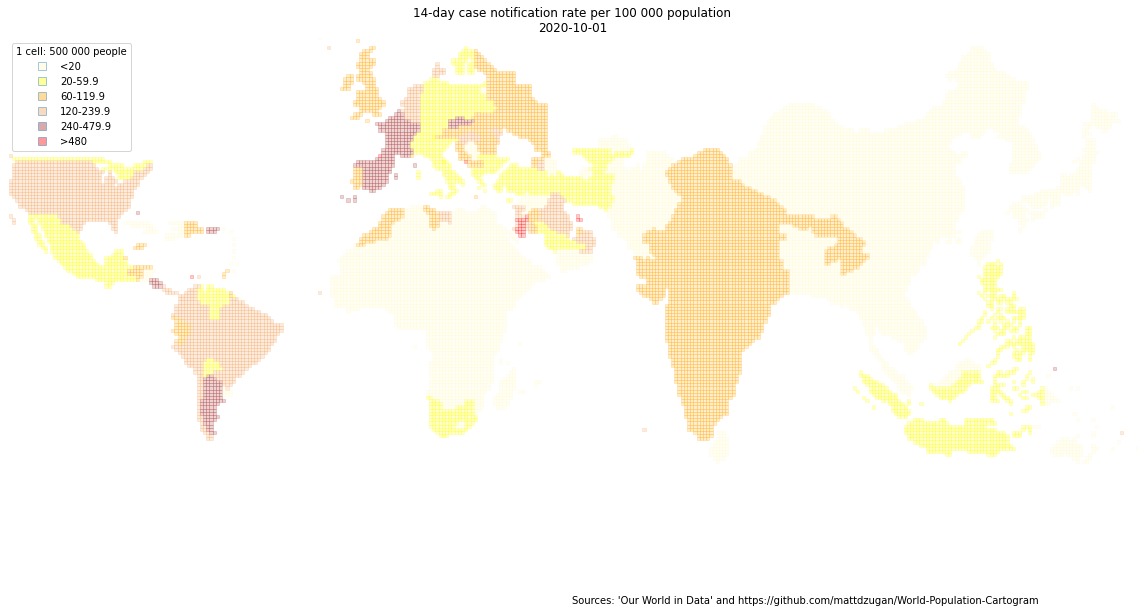

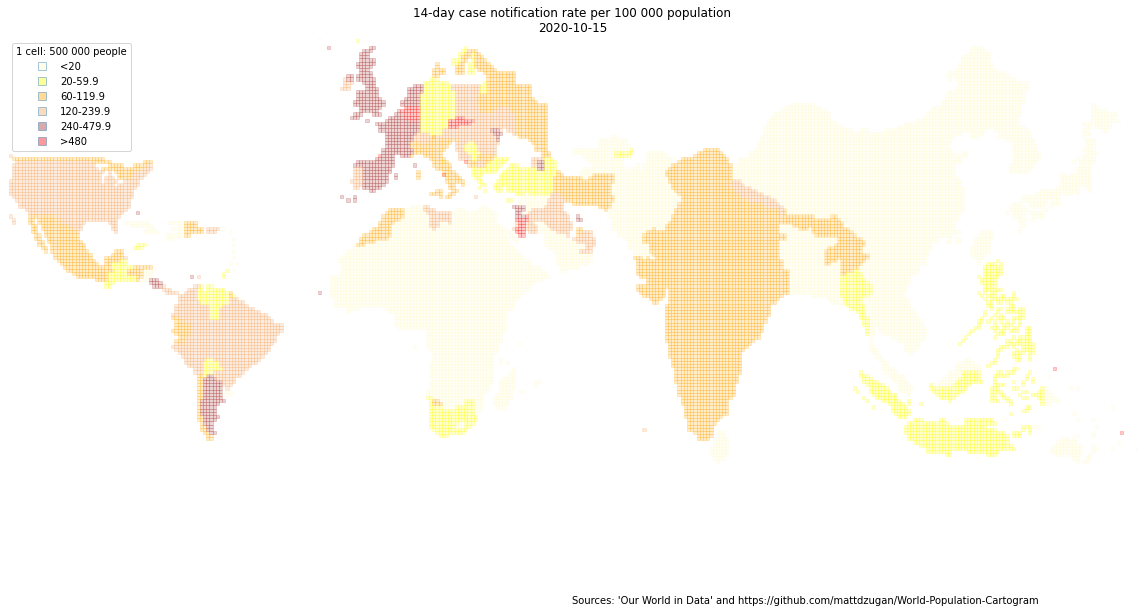

In [ ]:
for date in ['2020-05-01','2020-05-15',
             '2020-06-01','2020-06-15',
             '2020-07-01','2020-07-15',
             '2020-08-01','2020-08-15',
             '2020-09-01','2020-09-15',
             '2020-10-01', '2020-10-15']:

  one_day_df = pd.DataFrame(df_14_day[date])
  one_day_df['count'] = pd.cut(one_day_df[date], bins=cut_bins, labels=cut_labels)
  one_day_df['color'] = one_day_df['count'].map(color_dict)
  one_day_df = one_day_df.reset_index().rename(columns={'index':'CountryCode'})
  one_day_df = one_day_df.merge(iso_3166, left_on='CountryCode', right_on='alpha-3', how='left')
  one_day_df['country-code'] = one_day_df['country-code'].fillna(0).astype('int')

  cells_day = cells.merge(one_day_df[['country-code','color']], left_on='CountryCode', right_on='country-code', how='left')
  cells_day.color.fillna('lemonchiffon',inplace=True)

  fig = plt.figure(figsize=(16,10))
  ax = fig.add_subplot(111, aspect='equal')
  plt.xlim([0, max(cells_day["X"]+1)])
  plt.ylim([0, max(cells_day["Y"]+1)])
  n=cells_day.shape[0]
  patches = []
  for i in range(0,n):
    patches.append(matplotlib.patches.Rectangle((cells_day.loc[i,"X"]+.5, cells_day.loc[i,"Y"]+.5),1,1))
  ax.add_collection(PatchCollection(patches, color=cells_day.color, alpha=0.2))

  sq1 = Line2D([0], [0], linestyle="none", marker="s", alpha=0.4, markersize=8, markerfacecolor="lemonchiffon")
  sq2 = Line2D([0], [0], linestyle="none", marker="s", alpha=0.4, markersize=8, markerfacecolor="yellow")
  sq3 = Line2D([0], [0], linestyle="none", marker="s", alpha=0.4, markersize=8, markerfacecolor="orange")
  sq4 = Line2D([0], [0], linestyle="none", marker="s", alpha=0.4, markersize=8, markerfacecolor="sandybrown")
  sq5 = Line2D([0], [0], linestyle="none", marker="s", alpha=0.4, markersize=8, markerfacecolor="brown")
  sq6 = Line2D([0], [0], linestyle="none", marker="s", alpha=0.4, markersize=8, markerfacecolor="red")

  plt.legend((sq1, sq2, sq3, sq4, sq5, sq6), ('<20','20-59.9','60-119.9','120-239.9','240-479.9','>480'),
             numpoints=1, loc="upper left", title='1 cell: 500 000 people', fontsize=10)
  title = '14-day case notification rate per 100 000 population\n'+date
  plt.title(title)
  plt.axis('off')
  plt.figtext(0.5, 0.01, "Sources: 'Our World in Data' and https://github.com/mattdzugan/World-Population-Cartogram")
  plt.tight_layout()
  plt.savefig(date, dpi=300)
  plt.show()
  plt.close()